# 一、Python基础
## 1.列表推导式与条件赋值

In [1]:
import numpy as np
import pandas as pd

In [2]:
L = []

def my_func(x):
    return 2*x
for i in range(5):
    L.append(my_func(i))
L

[0, 2, 4, 6, 8]

In [3]:
#以上写法可改写如下
[my_func(i) for i in range(5)]

[0, 2, 4, 6, 8]

In [4]:
[m+'_'+n for m in ['a','b'] for n in ['c','d']]

['a_c', 'a_d', 'b_c', 'b_d']

In [5]:
value = 'cat' if 2>1 else 'dog'
value

'cat'

In [421]:
L = [i for i in range(7)]
M = [i if i <=3 else 5 for i in L]#不能缺少else
M

[0, 1, 2, 3, 5, 5, 5]

## 2.匿名函数与map方法

In [7]:
my_func = lambda x: 2*x
my_func(3)

6

In [8]:
plus_func = lambda a,b:a+b
plus_func(3,4)

7

In [9]:
[(lambda x:x*2)(i) for i in range(5)]

[0, 2, 4, 6, 8]

对于上述的这种列表推导式的匿名函数映射， Python 中提供了 map 函数来完成，它返回的是一个 map 对象，需要通过 list 转为列表

In [10]:
list(map(lambda x:2*x,range(5)))

[0, 2, 4, 6, 8]

In [11]:
list(map(lambda x,y:str(x)+'_'+y,range(5),list('abcde')))

['0_a', '1_b', '2_c', '3_d', '4_e']

## 3.zip对象与enumerate方法

zip函数能够把多个可迭代对象打包成一个元组构成的可迭代对象，它返回了一个 zip 对象，通过 tuple, list 可以得到相应的打包结果

In [12]:
L1,L2,L3 = list('abc'),list('def'),list('hij')
print(list(zip(L1,L2,L3)))
print(tuple(zip(L1,L2,L3)))

[('a', 'd', 'h'), ('b', 'e', 'i'), ('c', 'f', 'j')]
(('a', 'd', 'h'), ('b', 'e', 'i'), ('c', 'f', 'j'))


往往会在循环迭代的时候使用到 zip 函数

In [13]:
for i,j,k in zip(L1,L2,L3):
    print(i,j,k)

a d h
b e i
c f j


enumerate 是一种特殊的打包，它可以在迭代时绑定迭代元素的遍历序号

In [14]:
L = list('abcd')
for index,value in enumerate(L):
    print(index,value)

0 a
1 b
2 c
3 d


In [15]:
for index,value in zip(range(len(L)),L):
    print(index,value)

0 a
1 b
2 c
3 d


当需要对两个列表建立字典映射时，可以利用 zip 对象

In [16]:
dict(zip(L1,L2))

{'a': 'd', 'b': 'e', 'c': 'f'}

既然有了压缩函数，那么 Python 也提供了 * 操作符和 zip 联合使用来进行解压操作

In [17]:
zipped = list(zip(L1,L2,L3))
zipped

[('a', 'd', 'h'), ('b', 'e', 'i'), ('c', 'f', 'j')]

In [18]:
list(zip(*zipped))

[('a', 'b', 'c'), ('d', 'e', 'f'), ('h', 'i', 'j')]

# 二、Numpy基础
## 1.np数组的构造
### a.等差序列（linspace,arange）

In [19]:
np.linspace(1,5,11)#起始，终止（包含），样本数

array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])

In [20]:
np.arange(1,5,2)#起始，终止（不包含），步长

array([1, 3])

### b.特殊矩阵（zeros,ones,eye,full）

In [21]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
np.ones((2,3,3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [23]:
np.eye(3)#3*3的单位矩阵

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
np.eye(3,k=1)#偏移主对角线一个单位的伪单位矩阵

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [25]:
np.full((2,3),10)#填充单个元素

array([[10, 10, 10],
       [10, 10, 10]])

In [26]:
np.full((2,3),[1,2,3])#填充行元素

array([[1, 2, 3],
       [1, 2, 3]])

### c.随机矩阵（random）
+ rand:0-1均匀分布的随机数组
+ randn:标准正态的随机数组
+ randint:随机整数组
+ choice：随机列表抽样
+ permutation:打散原列表

In [27]:
np.random.rand(3)

array([0.64461406, 0.87285253, 0.59978807])

In [28]:
np.random.rand(3,3)

array([[0.18136333, 0.01763762, 0.01693266],
       [0.57158509, 0.81753821, 0.09258647],
       [0.40831187, 0.41145666, 0.30186983]])

对于服从区间 a 到 b 上的均匀分布可以如下生成

In [29]:
a,b = 5,15
(b - a) * np.random.rand(3) + a

array([ 7.60125644,  8.05701419, 13.39866568])

randn生成了N(0,I)的标准正态分布

In [30]:
np.random.randn(3)

array([0.34102164, 0.04130136, 1.28105355])

In [31]:
np.random.randn(2,2)

array([[ 1.49534422,  1.06314776],
       [ 0.85115361, -0.93716397]])

对于服从方差为$\sigma^2$均值为$\mu$的一元正态分布可以如下生成

In [32]:
sigma,mu = 2.5,3
mu + np.random.randn(3) * sigma

array([7.93309965, 0.92225771, 1.10192069])

randint 可以指定生成随机整数的最小值最大值（不包含）和维度大小

In [33]:
low,high,size = 5,15,(2,2)#生成5-14的随机整数
np.random.randint(low,high,size)

array([[8, 6],
       [9, 5]])

choice 可以从给定的列表中，以一定概率和方式抽取结果，当不指定概率时为均匀采样，默认抽取方式为有放回抽样

In [34]:
my_list = ['a','b','c','d']
np.random.choice(my_list,2,replace=False,p=[0.1,0.7,0.1,0.1])#replace为True即为无放回抽样

array(['b', 'd'], dtype='<U1')

In [35]:
np.random.choice(my_list,(3,3))#有放回抽样

array([['c', 'b', 'c'],
       ['a', 'd', 'a'],
       ['b', 'a', 'd']], dtype='<U1')

当返回的元素个数与原列表相同时，等价于使用 permutation 函数，即打散原列表

In [36]:
np.random.choice(my_list,4,replace=False)

array(['d', 'c', 'b', 'a'], dtype='<U1')

In [37]:
np.random.permutation(my_list)

array(['c', 'b', 'd', 'a'], dtype='<U1')

随机种子，它能够固定随机数的输出结果

In [38]:
np.random.seed(0)
np.random.rand()

0.5488135039273248

In [39]:
np.random.seed(0)
np.random.rand()

0.5488135039273248

## np数组的变形与合并

### a.转置：T

In [40]:
np.zeros((2,3)).T

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

### b.合并操作：r_,c_
对于二维数组而言，r_和c_分别表示上下合并和左右合并

In [41]:
np.r_[np.zeros((2,3)),np.zeros((2,3))]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
np.c_[np.zeros((2,3)),np.zeros((2,3))]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

一维数组和二维数组进行合并时，应当把其视作列向量，在长度匹配的情况下只能够使用左右合并的 c_ 操作:

In [53]:
np.r_[np.array([0]),np.zeros((2))]

array([0., 0., 0.])

In [54]:
np.c_[np.array([0,0]),np.zeros((2,3))]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### c.维度变换：reshape
reshape 能够帮助用户把原数组按照新的维度重新排列。在使用时有两种模式，分别为 C 模式和 F 模式，分别以逐行和逐列的顺序进行填充读取。

In [61]:
target = np.arange(8).reshape(2,4)
target

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [65]:
target.reshape((4,2),order='C')# 按照行读取和填充

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [66]:
target.reshape((4,2), order='F')# 按照列读取和填充

array([[0, 2],
       [4, 6],
       [1, 3],
       [5, 7]])

In [68]:
target.reshape((4,2))#默认行读取和填充

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

特别地，由于被调用数组的大小是确定的， reshape 允许有一个维度存在空缺，此时只需填充-1即可：

In [69]:
target.reshape(2,-1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

下面将 n*1 大小的数组转为1维数组的操作是经常使用的：

In [72]:
target = np.ones((4,1))
target

array([[1.],
       [1.],
       [1.],
       [1.]])

In [74]:
target.reshape(-1,2)

array([[1., 1.],
       [1., 1.]])

In [80]:
target.reshape(-1)

array([1., 1., 1., 1.])

## np数组的切片与索引

数组的切片模式支持使用 slice 类型的 start:end:step 切片，还可以直接传入列表指定某个维度的索引进行切片：

In [82]:
target = np.arange(9).reshape(3,3)
target

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [87]:
target[:-1,[0,2]]

array([[0, 2],
       [3, 5]])

此外，还可以利用 np.ix_ 在对应的维度上使用布尔索引，但此时不能使用 slice 切片：

In [88]:
target[np.ix_([True,False,True],[True,False,True])]

array([[0, 2],
       [6, 8]])

In [89]:
target[np.ix_([1,2],[True,False,True])]

array([[3, 5],
       [6, 8]])

In [92]:
target[target%2==0]

array([0, 2, 4, 6, 8])

当数组维度为1维时，可以直接进行布尔索引，而无需 np.ix_ ：

In [90]:
new = target.reshape(-1)
new

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [91]:
new[new%2==0]

array([0, 2, 4, 6, 8])

## 4.常用函数

### a.where

In [95]:
x = np.arange(9).reshape(3,-1)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [101]:
np.where(x>5,1,100)

array([[100, 100, 100],
       [100, 100, 100],
       [  1,   1,   1]])

In [102]:
np.where(x>5,1,x)# 对应位置为True时填充1，否则填充x对应元素

array([[0, 1, 2],
       [3, 4, 5],
       [1, 1, 1]])

### b.nonzero,argmax,argmin

这三个函数返回的都是索引， nonzero 返回非零数的索引， argmax, argmin 分别返回最大和最小数的索引：

In [104]:
a = np.array([-2,-5,0,1,3,-1])
np.nonzero(a)

(array([0, 1, 3, 4, 5], dtype=int64),)

In [105]:
a.argmax()

4

In [106]:
a.argmin()

1

### c.any,all

any 指当序列至少 存在一个 True 或非零元素时返回 True ，否则返回 False

all 指当序列元素 全为 True 或非零元素时返回 True ，否则返回 False

In [107]:
a = np.array([0,1])
a.any()

True

In [108]:
a.all()

False

### d.cumprod,cumsum,diff

cumprod, cumsum 分别表示累乘和累加函数，返回同长度的数组， diff 表示和前一个元素做差，由于第一个元素为缺失值，因此在默认参数情况下，返回长度是原数组减1

In [111]:
a = np.arange(5)+ 1
a.cumprod()

array([  1,   2,   6,  24, 120], dtype=int32)

In [112]:
a.cumsum()

array([ 1,  3,  6, 10, 15], dtype=int32)

In [116]:
np.diff(a)

array([1, 1, 1, 1])

### e.统计函数

常用的统计函数包括 max, min, mean, median, std, var, sum, quantile ，其中分位数计算是全局方法，因此不能通过 array.quantile 的方法调用：

In [169]:
target = np.arange(1,6)
target

array([1, 2, 3, 4, 5])

In [147]:
target.max()

5

In [148]:
target.min()

1

In [170]:
target.mean()

3.0

In [172]:
np.median(target)

3.0

In [174]:
target.std()

1.4142135623730951

In [175]:
target.var()

2.0

In [157]:
np.quantile(target,0.2)#0.2分位数

1.8

PS:分位数计算

1、将数据从小到大排序，计为数组a（1 to n），n代表数据的长度

2、确定四分位数的位置：b= 1+(n-1)*分位数

但是对于含有缺失值的数组，它们返回的结果也是缺失值，如果需要略过缺失值，必须使用 nan* 类型的函数，上述的几个统计函数都有对应的 nan* 函数。

In [142]:
target = np.array([1,2,np.nan])
target

array([ 1.,  2., nan])

In [143]:
target.max()

nan

In [144]:
np.nanmax(target)

2.0

In [145]:
np.nanquantile(target,0.25)

1.25

对于协方差和相关系数分别可以利用 cov, corrcoef 如下计算：

In [161]:
target1 = np.array([1,3,5,7])
target2 = np.array([2,4,6,-8])

In [162]:
np.cov(target1,target2)

array([[ 6.66666667, -9.33333333],
       [-9.33333333, 38.66666667]])

In [163]:
np.corrcoef(target1,target2)

array([[ 1.        , -0.58131836],
       [-0.58131836,  1.        ]])

最后，需要说明二维 Numpy 数组中统计函数的 axis 参数，它能够进行某一个维度下的统计特征计算，当 axis=0 时结果为列的统计指标，当 axis=1 时结果为行的统计指标：

In [165]:
target = np.arange(1,10).reshape(3,-1)
target

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [166]:
target.sum()

45

In [167]:
target.sum(axis=1)

array([ 6, 15, 24])

In [168]:
target.sum(axis=0)

array([12, 15, 18])

## 5.广播机制
广播机制用于处理两个不同维度数组之间的操作，这里只讨论不超过两维的数组广播机制。

### a.标量和数组的操作
当一个标量和数组进行运算时，标量会自动把大小扩充为数组大小，之后进行逐元素操作：

In [180]:
res = 3 * np.ones((2,2)) + 1
res

array([[4., 4.],
       [4., 4.]])

In [179]:
res = 1 / res
res

array([[0.25, 0.25],
       [0.25, 0.25]])

### b.二维数组之间的操作
当两个数组维度完全一致时，使用对应元素的操作，否则会报错，除非其中的某个数组的维度是 m×1 或者 1×n ，那么会扩充其具有 1 的维度为另一个数组对应维度的大小。例如， 1×2 数组和 3×2 数组做逐元素运算时会把第一个数组扩充为 3×2 ，扩充时的对应数值进行赋值。但是，需要注意的是，如果第一个数组的维度是 1×3 ，那么由于在第二维上的大小不匹配且不为 1 ，此时报错。

In [181]:
res = np.ones((3,2))
res

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [195]:
x = np.array([[2,3]])
x.shape

(1, 2)

In [196]:
res * x#扩充第一维度为3

array([[2., 3.],
       [2., 3.],
       [2., 3.]])

In [206]:
y = np.array([[2],[3],[4]])
y.shape

(3, 1)

In [207]:
res * y#扩充第二维度为2

array([[2., 2.],
       [3., 3.],
       [4., 4.]])

In [201]:
z = np.array([[2]])
z.shape

(1, 1)

In [203]:
res * z#等价于两次扩充

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

### c.一维数组与二维数组的操作
当一维数组 $A_k$ 与二维数组 $B_{m,n}$ 操作时，等价于把一维数组视作 $A_{1,k}$ 的二维数组，使用的广播法则与【b】中一致，当 k!=n 且 k,n 都不是 1 时报错。

In [208]:
np.ones(3) + np.ones((2,3))

array([[2., 2., 2.],
       [2., 2., 2.]])

In [213]:
np.ones(3) + np.ones((4,1))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [212]:
np.ones(1)+np.ones((2,3))

array([[2., 2., 2.],
       [2., 2., 2.]])

## 6.向量与矩阵的计算
### a.向量内积:dot
$a·b = \sum\limits_ia_ib_i$

In [214]:
a = np.array([1,2,3])
b=np.array([1,3,5])
a.dot(b)

22

### b.向量番薯和矩阵范数：np.linalg.norm
在矩阵范数的计算中，最重要的是 ord 参数
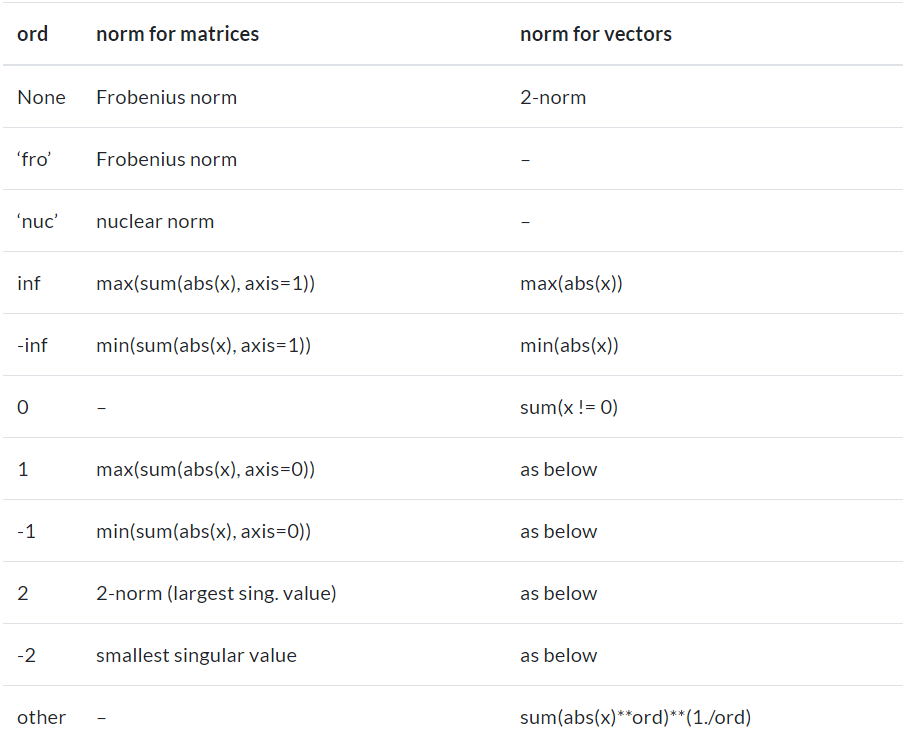

In [219]:
martix_target = np.arange(9).reshape(-1,3)
martix_target

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [220]:
np.linalg.norm(martix_target,'fro')

14.2828568570857

In [221]:
np.linalg.norm(martix_target,np.inf)

21.0

In [223]:
np.linalg.norm(martix_target,-np.inf)

3.0

In [224]:
np.linalg.norm(martix_target,2)

14.226707390822694

In [225]:
np.linalg.norm(martix_target,-2)

4.979027806505633e-16

### c.矩阵乘法:@
$[A_{m×p}B_{p×n}]_{ij}=\sum\limits_{k=1}^pA_{ik}B_{kj}$

In [228]:
a = np.arange(4).reshape(-1,2)
a

array([[0, 1],
       [2, 3]])

In [229]:
b = np.arange(4,8).reshape(-1,2)
b

array([[4, 5],
       [6, 7]])

In [230]:
a@b

array([[ 6,  7],
       [26, 31]])

# 三、练习
## Ex1:利用列表推导式写矩阵乘法
一般的矩阵乘法根据公式，可以由三重循环写出：

In [231]:
M1 = np.random.rand(2,3)
M2 = np.random.rand(3,4)
res = np.empty((M1.shape[0],M2.shape[1]))
for i in range(M1.shape[0]):
    for j in range(M2.shape[1]):
        item = 0
        for k in range(M1.shape[1]):
            item += M1[i][k] * M2[k][j]
            res[i][j] = item


In [232]:
((M1@M2 - res) < 1e-15).all() 

True

In [301]:
M1 = np.arange(6).reshape(2,3)
M2 = np.arange(6).reshape(3,2)
res=[[sum([M1[i][k]*M2[k][j] for k in range(M1.shape[1])]) for j in range(M2.shape[1])] for i in range(M1.shape[0])]
res

[[10, 13], [28, 40]]

In [302]:
((M1@M2 - res) < 1e-15).all() 

True

关于列表推导式的一些助于理解的代码

In [299]:
a=np.array([1,2])
b=np.array([2,3])
n = np.empty((2,2))
n=[[a[i]*b[j] for i in range(a.shape[0])] for j in range(b.shape[0])]
n

[[2, 4], [3, 6]]

In [303]:
m=[[3 for i in range(4)] for j in range(3)]
m

[[3, 3, 3, 3], [3, 3, 3, 3], [3, 3, 3, 3]]

## Ex2：更新矩阵
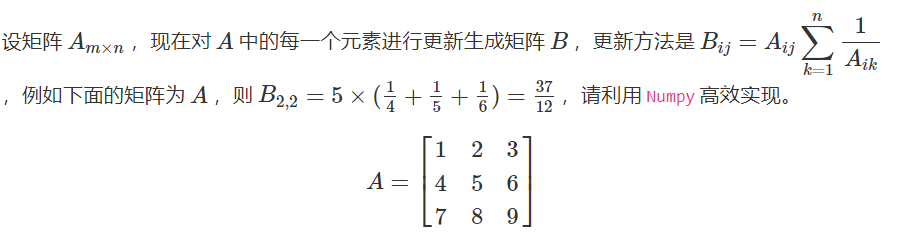

In [305]:
a = np.arange(1,10).reshape(3,3)
b = np.zeros((3,3))
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [324]:
b=[[a[i][j]*sum([1/a[i][k] for k in range(a.shape[1])])for j in range(a.shape[1])] for i in range(a.shape[0])]
b

[[1.8333333333333333, 3.6666666666666665, 5.5],
 [2.466666666666667, 3.0833333333333335, 3.7],
 [2.6527777777777777, 3.0317460317460316, 3.4107142857142856]]

## Ex3:卡方统计量
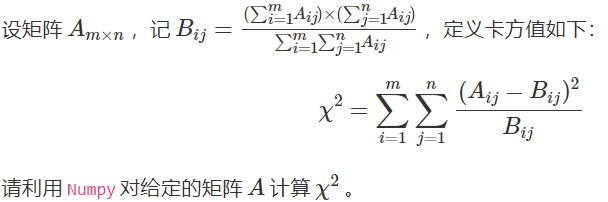

In [325]:
np.random.seed(0)
A = np.random.randint(10,20,(8,5))
A

array([[15, 10, 13, 13, 17],
       [19, 13, 15, 12, 14],
       [17, 16, 18, 18, 11],
       [16, 17, 17, 18, 11],
       [15, 19, 18, 19, 14],
       [13, 10, 13, 15, 10],
       [12, 13, 18, 11, 13],
       [13, 13, 17, 10, 11]])

In [352]:
A.sum(0).shape

(5,)

In [365]:
B =A.sum(0)*A.sum(1).reshape(-1,1)/A.sum()#或sum(sum(A))

In [367]:
((A-B)**2/B).sum()

11.842696601945802

## Ex4：改进矩阵计算的性能
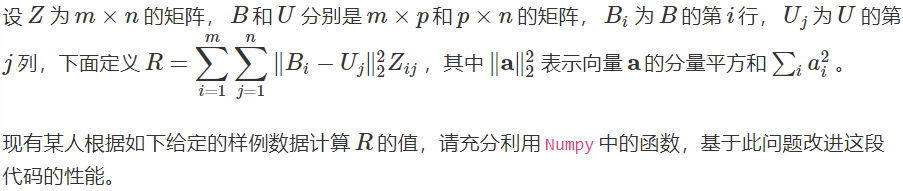

In [368]:
np.random.seed(0)
m,n,p = 100,80,50
B = np.random.randint(0,2,(m,p))
U = np.random.randint(0,2,(p,n))
Z = np.random.randint(0,2,(m,n))

def solution(B=B, U=U, Z=Z):
    L_res = []
    for i in range(m):
        for j in range(n):
            norm_value = ((B[i]-U[:,j])**2).sum()
            L_res.append(norm_value*Z[i][j])
    return sum(L_res)
solution(B, U, Z)

100566

## Ex5:连续整数的最大长度
输入一个整数的 Numpy 数组，返回其中递增连续整数子数组的最大长度。例如，输入 [1,2,5,6,7]，[5,6,7]为具有最大长度的递增连续整数子数组，因此输出3；输入[3,2,1,2,3,4,6]，[1,2,3,4]为具有最大长度的递增连续整数子数组，因此输出4。请充分利用 Numpy 的内置函数完成。（提示：考虑使用 nonzero, diff 函数）

In [434]:
x = np.array([3,2,1,2,3,4,5,6])
diff_x = np.diff(x)
diff_x

array([-1, -1,  1,  1,  1,  1,  1])

In [435]:
x_modified = np.where(diff_x==1,diff_x,0)
x_modified

array([0, 0, 1, 1, 1, 1, 1])

In [437]:
res = x_modified.sum()+1
res

6